In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
path = "C:/Users/shrra/Downloads/2024-06-25T13-17_export.csv"
datafram =pd.read_csv(path)

race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8']

race_counts = datafram[race_columns].sum()
print(race_counts)
race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8']
true_counts = datafram[race_columns].sum(axis=1)


true_counts = datafram[race_columns].sum(axis=1)


datafram = datafram[(true_counts < 2) & (~datafram['race___8'])]


datafram = datafram.reset_index(drop=True)


print(len(datafram))
race_counts = datafram[race_columns].sum()
print(race_counts)
def determine_new_race_5(row):
    if row['race___5']:
        return True
    else:
        return row['race___5']


datafram['new_race___5'] = datafram.apply(determine_new_race_5, axis=1)

datafram = datafram[~((datafram['race___5'] == False) & (datafram['race___8'] == True))]

race_columns = ['race___1', 'race___2', 'race___3', 'race___4', 'race___5','race___6', 'race___7','race___8','new_race___5']  
race_counts = datafram[race_columns].sum()
print(race_counts)
print(len(datafram))
import os
import json
import pandas as pd

df = datafram

def add_json_contents_to_df(df, base_folder_path):

    json_data_list = []
    
    for record_id in df['record_id']:
        json_file_name = f"sub-{record_id}_participant.json"
        folder_path = os.path.join(base_folder_path, f'sub-{record_id}')
        json_file_path = os.path.join(folder_path, json_file_name)
        
        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as file:
                json_data = json.load(file)
                emp_data = {'record_id': record_id}
                
                for item in json_data.get('item', []):
                    link_id = item.get('linkId')
                    answer_value = None
                    

                    if 'answer' in item and item['answer']:
                        answer = item['answer'][0]
                        if 'valueString' in answer:
                            answer_value = answer['valueString']
                        elif 'valueBoolean' in answer:
                            answer_value = answer['valueBoolean']
                    
                    emp_data[link_id] = answer_value
                
                json_data_list.append(emp_data)
        else:
            print(f"JSON file not found for record_id: {record_id}")

    json_df = pd.DataFrame(json_data_list)
    json_df = json_df.drop_duplicates(subset='record_id')
    
    print("Original DataFrame record count:", len(df))
    print("JSON DataFrame record count:", len(json_df))
    
    merged_df = pd.merge(df, json_df, on='record_id', how='left')
    
    print("Merged DataFrame record count:", len(merged_df))
    
    return merged_df


merged_df = add_json_contents_to_df(df, base_folder_path='C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/')
# print(merged_df)

selected_json_columns = [
    'demographics_session_id', 'demographics_duration', 'demographics_completed_by___1',
    'demographics_completed_by___2', 'demographics_completed_by___3', 'state_province', 'country',
    'gender_identity', 'specify_gender_identity', 'sexual_orientation', 'race___1', 'race___2',
    'race___3', 'race___4', 'race___5', 'race___6', 'race___7', 'race___8', 'ethnicity', 'other_edu_level',
    'hearing', 'vision', 'cognition', 'mobility', 'self_care', 'independent_living', 'employ_status___1',
    'employ_status___2', 'employ_status___3', 'employ_status___4', 'employ_status___5', 'employ_status___6',
    'employ_status___7', 'employ_status___8', 'employ_status___9', 'household_income_usa', 'household_income_ca',
    'marital_status___1', 'marital_status___2', 'marital_status___3', 'marital_status___4', 'marital_status___5',
    'marital_status___6', 'marital_status___7', 'housing_status', 'household_count', 'spouse_partner_sig_other',
    'children', 'parent', 'grandparent', 'other_live_with', 'others_household_specify', 'transportation_yn',
    'primary_transportation', 'q_generic_demographics_complete', 'new_race___5', 'selected_language',
    'enrollment_institution', 'age', 'eligible_studies___1', 'eligible_studies___2', 'eligible_studies___3',
    'eligible_studies___4', 'eligible_studies___5', 'is_control_participant', 'laryng_cancer', 'benign_cord_lesion',
    'rrp', 'spas_dys', 'voc_fold_paralysis', 'alz_dementia_mci', 'als', 'parkinsons', 'alcohol_subst_abuse', 'gad',
    'add_adhd', 'asd', 'bipolar', 'bpd', 'depression', 'ed', 'insomnia', 'ocd', 'panic', 'ptsd', 'schizophrenia',
    'soc_anx_dis', 'other_psych', 'asthma', 'airway_stenosis', 'chronic_cough', 'copd', 'osa']


selected_df = merged_df

df = selected_df[selected_json_columns]

def count_boolean_values(df):
    boolean_counts = {}
    for column in df.columns:
        if df[column].dtype == 'bool':
            counts = df[column].value_counts()
            boolean_counts[column] = {
                'True': counts.get(True, 0),
                'False': counts.get(False, 0)
            }
    return boolean_counts


boolean_value_counts = count_boolean_values(df)

# for column, counts in boolean_value_counts.items():
#     print(f"Column: {column}")
#     print(f"True: {counts['True']}")
#     print(f"False: {counts['False']}")
#     print()
removed_selected_df = selected_df[~((selected_df['record_id'] == 'ecf91a76-d72f-42e0-85e1-da9f2a7063f2') | (selected_df['record_id'] == 'eed0e4a4-c915-4ada-9d23-9e0c56fa0d37'))]

# for index, row in removed_selected_df.iterrows():
#     if row['record_id'] == 'ecf91a76-d72f-42e0-85e1-da9f2a7063f2':
#         print('YES')


count_boolean_values(removed_selected_df)

race___1      5
race___2      9
race___3     14
race___4      0
race___5    149
race___6      0
race___7      6
race___8      4
dtype: int64
169
race___1      1
race___2      7
race___3     11
race___4      0
race___5    144
race___6      0
race___7      6
race___8      0
dtype: int64
race___1          1
race___2          7
race___3         11
race___4          0
race___5        144
race___6          0
race___7          6
race___8          0
new_race___5    144
dtype: int64
169
Original DataFrame record count: 169
JSON DataFrame record count: 167
Merged DataFrame record count: 169


{'demographics_completed_by___1': {'True': 166, 'False': 1},
 'demographics_completed_by___2': {'True': 3, 'False': 164},
 'demographics_completed_by___3': {'True': 1, 'False': 166},
 'race___1': {'True': 1, 'False': 166},
 'race___2': {'True': 7, 'False': 160},
 'race___3': {'True': 11, 'False': 156},
 'race___4': {'True': 0, 'False': 167},
 'race___5': {'True': 142, 'False': 25},
 'race___6': {'True': 0, 'False': 167},
 'race___7': {'True': 6, 'False': 161},
 'race___8': {'True': 0, 'False': 167},
 'employ_status___1': {'True': 3, 'False': 164},
 'employ_status___2': {'True': 50, 'False': 117},
 'employ_status___3': {'True': 8, 'False': 159},
 'employ_status___4': {'True': 4, 'False': 163},
 'employ_status___5': {'True': 12, 'False': 155},
 'employ_status___6': {'True': 17, 'False': 150},
 'employ_status___7': {'True': 68, 'False': 99},
 'employ_status___8': {'True': 10, 'False': 157},
 'employ_status___9': {'True': 9, 'False': 158},
 'marital_status___1': {'True': 28, 'False': 139},

'airway_stenosis': {'True': 58, 'False': 109},

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import defaultdict

def split_dataset_equal_distribution(df, target_column, equal_column, true_count=58, false_count=109, random_state=42):


    df_true = df[df[target_column] == True].sample(n=true_count, random_state=random_state, replace=True)
    df_false = df[df[target_column] == False].sample(n=false_count, random_state=random_state, replace=True)
    df_filtered = pd.concat([df_true, df_false]).reset_index(drop=True)

    # minimum number of samples per class needed for train split
    min_samples_per_class = 2 


    class_counts = df_filtered.groupby(equal_column)[target_column].value_counts()
    valid_classes = class_counts[class_counts >= min_samples_per_class].index.get_level_values(equal_column).unique()
    df_filtered_valid = df_filtered[df_filtered[equal_column].isin(valid_classes)]

    # train (80%), validation (10%), and test (10%) sets
    df_train = pd.DataFrame()
    df_val = pd.DataFrame()
    df_test = pd.DataFrame()

    for race_value in valid_classes:

        df_race = df_filtered_valid[df_filtered_valid[equal_column] == race_value]
        class_counts_race = df_race[target_column].value_counts()
        classes_with_less_than_2_samples = class_counts_race[class_counts_race < min_samples_per_class].index.tolist()
        
        for class_label in classes_with_less_than_2_samples:
            oversample_count = min_samples_per_class - class_counts_race[class_label]
            if oversample_count > 0:
                df_oversample = df_race[df_race[target_column] == class_label].sample(n=oversample_count, replace=True, random_state=random_state)
                df_race = pd.concat([df_race, df_oversample])
        df_race_train, df_race_temp = train_test_split(df_race, test_size=0.3, random_state=random_state, stratify=df_race[target_column])
        df_race_val, df_race_test = train_test_split(df_race_temp, test_size=0.5, random_state=random_state, stratify=df_race_temp[target_column])

        df_train = pd.concat([df_train, df_race_train])
        df_val = pd.concat([df_val, df_race_val])
        df_test = pd.concat([df_test, df_race_test])

    return df_train, df_val, df_test


df = removed_selected_df
df_train, df_val, df_test = split_dataset_equal_distribution(df, target_column='airway_stenosis', equal_column='new_race___5')

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

print("Training set distribution (airway_stenosis):")
print(df_train['airway_stenosis'].value_counts())
print("Validation set distribution (airway_stenosis):")
print(df_val['airway_stenosis'].value_counts())
print("Test set distribution (airway_stenosis):")
print(df_test['airway_stenosis'].value_counts())

# distribution in each set for 'new_race___5'
print("Training set distribution (new_race___5):")
print(df_train['new_race___5'].value_counts())
print("Validation set distribution (new_race___5):")
print(df_val['new_race___5'].value_counts())
print("Test set distribution (new_race___5):")
print(df_test['new_race___5'].value_counts())


Training set size: 116
Validation set size: 25
Test set size: 26
Training set distribution (airway_stenosis):
airway_stenosis
False    76
True     40
Name: count, dtype: int64
Validation set distribution (airway_stenosis):
airway_stenosis
False    16
True      9
Name: count, dtype: int64
Test set distribution (airway_stenosis):
airway_stenosis
False    17
True      9
Name: count, dtype: int64
Training set distribution (new_race___5):
new_race___5
True     94
False    22
Name: count, dtype: int64
Validation set distribution (new_race___5):
new_race___5
True     20
False     5
Name: count, dtype: int64
Test set distribution (new_race___5):
new_race___5
True     21
False     5
Name: count, dtype: int64


Training set size: 116
Validation set size: 25
Test set size: 26
Training set distribution (airway_stenosis):
airway_stenosis
False    76
True     40
Name: count, dtype: int64
Validation set distribution (airway_stenosis):
airway_stenosis
False    16
True      9
Name: count, dtype: int64
Test set distribution (airway_stenosis):
airway_stenosis
False    17
True      9
Name: count, dtype: int64
Training set distribution (new_race___5):
new_race___5
True     94
False    22
Name: count, dtype: int64
Validation set distribution (new_race___5):
new_race___5
True     20
False     5
Name: count, dtype: int64
Test set distribution (new_race___5):
new_race___5
True     21
False     5
Name: count, dtype: int64


C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")
C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")
C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")


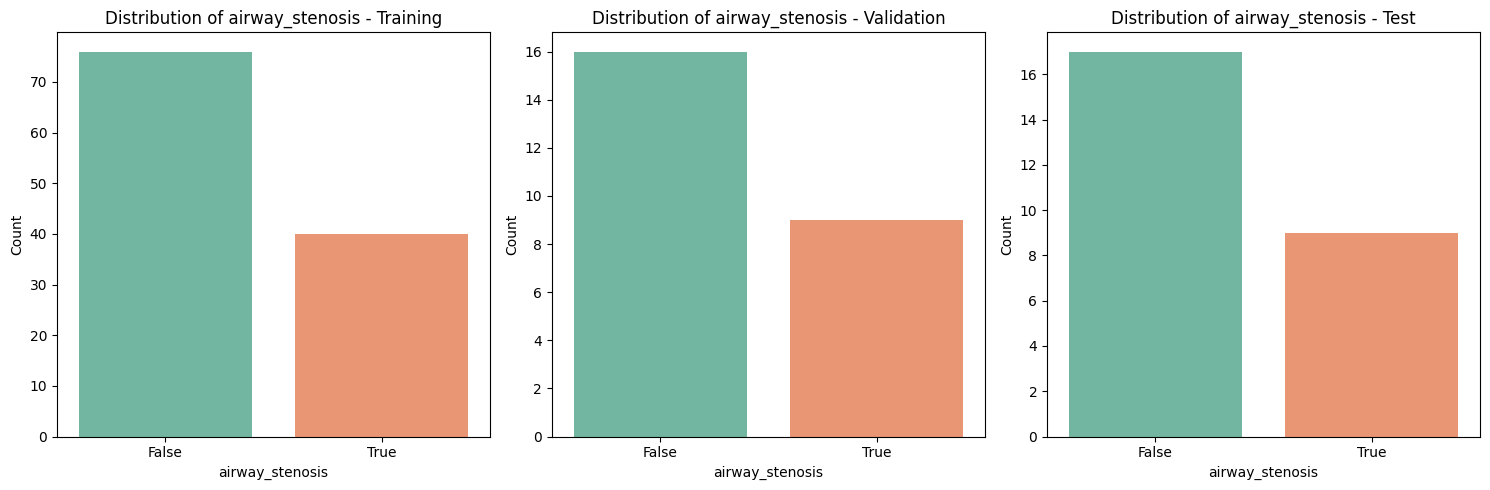

C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")
C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")
C:\Users\shrra\AppData\Local\Temp\ipykernel_7204\3270395029.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, palette="Set2")


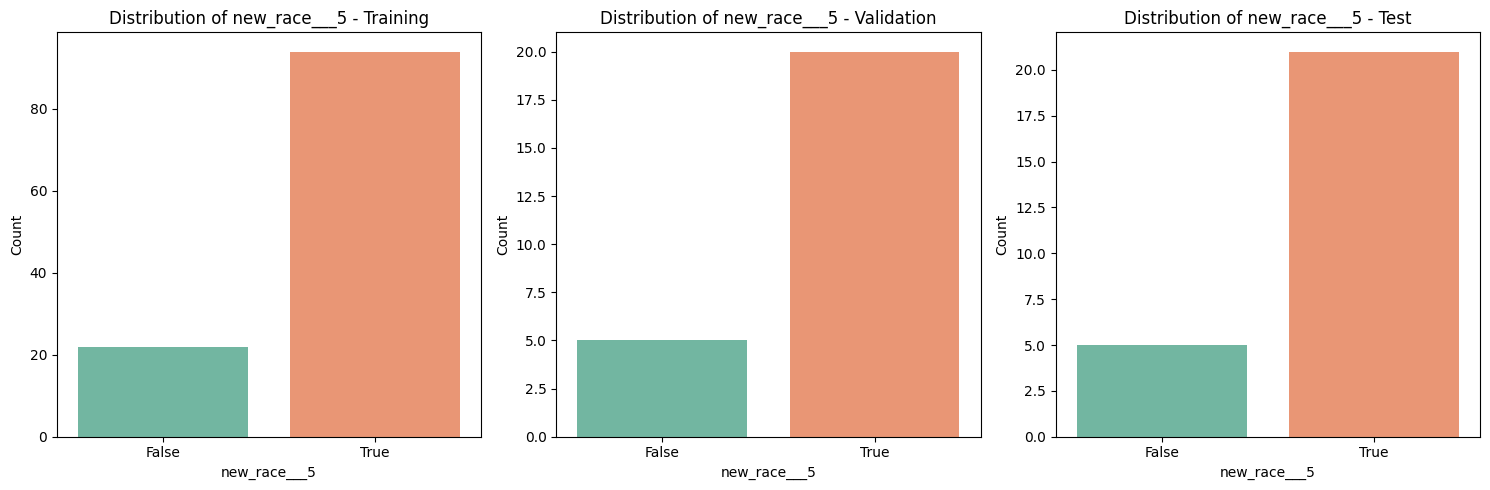

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = removed_selected_df
df_train, df_val, df_test = split_dataset_equal_distribution(df, target_column='airway_stenosis', equal_column='new_race___5')


print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

#  'airway_stenosis'
print("Training set distribution (airway_stenosis):")
print(df_train['airway_stenosis'].value_counts())
print("Validation set distribution (airway_stenosis):")
print(df_val['airway_stenosis'].value_counts())
print("Test set distribution (airway_stenosis):")
print(df_test['airway_stenosis'].value_counts())

#  'new_race___5'
print("Training set distribution (new_race___5):")
print(df_train['new_race___5'].value_counts())
print("Validation set distribution (new_race___5):")
print(df_val['new_race___5'].value_counts())
print("Test set distribution (new_race___5):")
print(df_test['new_race___5'].value_counts())

def plot_distribution(df_list, labels, column_name, title_prefix):
    plt.figure(figsize=(15, 5))
    
    for df, label in zip(df_list, labels):
        plt.subplot(1, len(df_list), labels.index(label) + 1)
        sns.countplot(data=df, x=column_name, palette="Set2")
        plt.title(f"{title_prefix} - {label}")
        plt.xlabel(column_name)
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


plot_distribution([df_train, df_val, df_test], ['Training', 'Validation', 'Test'], 'airway_stenosis', 'Distribution of airway_stenosis')
plot_distribution([df_train, df_val, df_test], ['Training', 'Validation', 'Test'], 'new_race___5', 'Distribution of new_race___5')


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import librosa
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Desired duration in seconds
# desired_duration = 15

# # Base directory where the subject folders are located
# base_dir = 'C:/Users/shrra/Downloads/Bridge2AI/bridge2ai-voice-corpus-2-including-sensitive-recordings1/bids_with_sensitive_recordings/'

# # WAV file suffix to check for
# target_wav_suffix = 'Rainbow-Passage_rec-Rainbow-Passage.wav'

# # Function to load and preprocess audio features from WAV file
# def load_wav_file(file_path, duration):
#     try:
#         y, sr = librosa.load(file_path, sr=None)
#         # Calculate the number of samples required for the desired duration
#         target_samples = duration * sr
        
#         # Trim or pad the audio to match the desired duration
#         if len(y) > target_samples:
#             y = y[:int(target_samples)]  # Trim audio
#         else:
#             y = np.pad(y, (0, int(target_samples) - len(y)), 'constant')  # Pad audio
        
#         # Convert to Mel spectrogram
#         mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
#         return mel_spectrogram
#     except Exception as e:
#         print(f"Error encountered while parsing file: {file_path} - {e}")
#         return None

# # Function to extract features and labels based on the dataframe
# def extract_features_labels(df, base_dir, target_wav_suffix, duration):
#     features = []
#     labels = []
#     for _, row in df.iterrows():
#         subject_id = f"sub-{row['record_id']}"
#         session_id = f"ses-{row['demographics_session_id']}"
#         race = row['airway_stenosis']
#         subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
#         if not os.path.exists(subject_folder):
#             print(f"Subject folder does not exist: {subject_folder}")
#             continue

#         found_file = False
#         for file_name in os.listdir(subject_folder):
#             if file_name.endswith(target_wav_suffix):
#                 file_path = os.path.join(subject_folder, file_name)
#                 mel_spectrogram = load_wav_file(file_path, duration)
#                 if mel_spectrogram is not None:
#                     features.append(mel_spectrogram.T)  # Transpose to have time x features
#                     labels.append(race)
#                 found_file = True
#                 break
#         if not found_file:
#             print(f"No matching file found for subject {subject_id}")

#     return np.array(features), np.array(labels)

# # Extract features and labels for train, validation, and test sets
# X_train, y_train = extract_features_labels(df_train, base_dir, target_wav_suffix, desired_duration)
# X_val, y_val = extract_features_labels(df_val, base_dir, target_wav_suffix, desired_duration)
# X_test, y_test = extract_features_labels(df_test, base_dir, target_wav_suffix, desired_duration)

# # Check if any data is extracted
# if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
#     print("No features or labels were extracted. Exiting.")
#     exit()

# # Encode the labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_val_encoded = label_encoder.transform(y_val)
# y_test_encoded = label_encoder.transform(y_test)

# # Standardize the features
# scaler = StandardScaler()
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))  # Flatten for scaling
# X_val_reshaped = np.reshape(X_val, (X_val.shape[0], -1))
# X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# X_train_scaled = scaler.fit_transform(X_train_reshaped)
# X_val_scaled = scaler.transform(X_val_reshaped)
# X_test_scaled = scaler.transform(X_test_reshaped)

# # Reshape back to original shape for CNN input
# X_train_scaled = np.reshape(X_train_scaled, (X_train.shape[0], X_train.shape[1], -1))
# X_val_scaled = np.reshape(X_val_scaled, (X_val.shape[0], X_val.shape[1], -1))
# X_test_scaled = np.reshape(X_test_scaled, (X_test.shape[0], X_test.shape[1], -1))

# # Define a simple CNN model using TensorFlow/Keras
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# # Define the learning rate
# learning_rate = 0.005  # Adjust this value as needed

# # Create an Adam optimizer with the specified learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# # Compile the model with the custom optimizer
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# num_epochs = 10
# history = model.fit(X_train_scaled, y_train_encoded, 
#                     epochs=num_epochs, 
#                     validation_data=(X_val_scaled, y_val_encoded),
#                     batch_size=32)

# # Evaluate the model
# val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_encoded)
# print(f"\nValidation Accuracy: {val_accuracy}")

# # Predict on test set
# y_test_pred = model.predict(X_test_scaled)
# y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# test_accuracy = accuracy_score(y_test_encoded, y_test_pred_classes)
# print(f"\nTest Accuracy: {test_accuracy}")
# print("Test Classification Report:")
# print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_.astype(str)))

# # Plot Confusion Matrix
# conf_mat = confusion_matrix(y_test_encoded, y_test_pred_classes)
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import librosa
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Desired duration in seconds
# desired_duration = 15

# # Base directory where the subject folders are located
# base_dir = 'C:/Users/shrra/Downloads/Bridge2AI_fil/bridge2ai-voice-corpus-2-including-sensitive-recordings/bids_with_sensitive_recordings'

# # WAV file suffix to check for
# target_wav_suffix = 'Rainbow-Passage_rec-Rainbow-Passage_trimmed.wav'

# # Function to load and preprocess audio features from WAV file
# def load_wav_file(file_path, duration):
#     try:
#         y, sr = librosa.load(file_path, sr=None)
#         # Calculate the number of samples required for the desired duration
#         target_samples = duration * sr
        
#         # Trim or pad the audio to match the desired duration
#         if len(y) > target_samples:
#             y = y[:int(target_samples)]  # Trim audio
#         else:
#             y = np.pad(y, (0, int(target_samples) - len(y)), 'constant')  # Pad audio
        
#         # Convert to Mel spectrogram
#         mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
#         return mel_spectrogram
#     except Exception as e:
#         print(f"Error encountered while parsing file: {file_path} - {e}")
#         return None

# # Function to extract features and labels based on the dataframe
# def extract_features_labels(df, base_dir, target_wav_suffix, duration):
#     features = []
#     labels = []
#     for _, row in df.iterrows():
#         subject_id = f"sub-{row['record_id']}"
#         session_id = f"ses-{row['demographics_session_id']}"
#         race = row['airway_stenosis']
#         subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
#         if not os.path.exists(subject_folder):
#             print(f"Subject folder does not exist: {subject_folder}")
#             continue

#         found_file = False
#         for file_name in os.listdir(subject_folder):
#             if file_name.endswith(target_wav_suffix):
#                 file_path = os.path.join(subject_folder, file_name)
#                 mel_spectrogram = load_wav_file(file_path, duration)
#                 if mel_spectrogram is not None:
#                     features.append(mel_spectrogram.T)  # Transpose to have time x features
#                     labels.append(race)
#                 found_file = True
#                 break
#         if not found_file:
#             print(f"No matching file found for subject {subject_id}")

#     return np.array(features), np.array(labels)

# # Extract features and labels for train, validation, and test sets
# X_train, y_train = extract_features_labels(df_train, base_dir, target_wav_suffix, desired_duration)
# X_val, y_val = extract_features_labels(df_val, base_dir, target_wav_suffix, desired_duration)
# X_test, y_test = extract_features_labels(df_test, base_dir, target_wav_suffix, desired_duration)

# # Check if any data is extracted
# if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
#     print("No features or labels were extracted. Exiting.")
#     exit()

# # Encode the labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_val_encoded = label_encoder.transform(y_val)
# y_test_encoded = label_encoder.transform(y_test)

# # Standardize the features
# scaler = StandardScaler()
# X_train_reshaped = np.reshape(X_train, (X_train.shape[0], -1))  # Flatten for scaling
# X_val_reshaped = np.reshape(X_val, (X_val.shape[0], -1))
# X_test_reshaped = np.reshape(X_test, (X_test.shape[0], -1))

# X_train_scaled = scaler.fit_transform(X_train_reshaped)
# X_val_scaled = scaler.transform(X_val_reshaped)
# X_test_scaled = scaler.transform(X_test_reshaped)

# # Reshape back to original shape for CNN input
# X_train_scaled = np.reshape(X_train_scaled, (X_train.shape[0], X_train.shape[1], -1))
# X_val_scaled = np.reshape(X_val_scaled, (X_val.shape[0], X_val.shape[1], -1))
# X_test_scaled = np.reshape(X_test_scaled, (X_test.shape[0], X_test.shape[1], -1))

# # Define a simple CNN model using TensorFlow/Keras
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# # Define the learning rate
# learning_rate = 0.001  # Adjust this value as needed

# # Create an Adam optimizer with the specified learning rate
# optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# # Compile the model with the custom optimizer
# model.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# num_epochs = 10
# history = model.fit(X_train_scaled, y_train_encoded, 
#                     epochs=num_epochs, 
#                     validation_data=(X_val_scaled, y_val_encoded),
#                     batch_size=32)

# # Evaluate the model
# val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val_encoded)
# print(f"\nValidation Accuracy: {val_accuracy}")

# # Predict on test set
# y_test_pred = model.predict(X_test_scaled)
# y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# test_accuracy = accuracy_score(y_test_encoded, y_test_pred_classes)
# print(f"\nTest Accuracy: {test_accuracy}")
# print("Test Classification Report:")
# print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_.astype(str)))

# # Plot Confusion Matrix
# conf_mat = confusion_matrix(y_test_encoded, y_test_pred_classes)
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix')
# plt.show()


CNN

Epoch 1/25


c:\Users\shrra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5200 - loss: 98.0428 - val_accuracy: 0.6400 - val_loss: 19.5468
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5825 - loss: 22.6710 - val_accuracy: 0.3600 - val_loss: 4.7019
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5471 - loss: 2.8409 - val_accuracy: 0.6000 - val_loss: 0.9407
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7212 - loss: 0.6590 - val_accuracy: 0.6400 - val_loss: 2.0464
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6945 - loss: 0.9472 - val_accuracy: 0.7600 - val_loss: 1.1630
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8684 - loss: 0.3257 - val_accuracy: 0.7200 - val_loss: 0.8054
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8317 - loss: 0.3939 - val_accuracy: 0.7200 - val_loss: 0.8034
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8097 - loss: 0.4437 - val_accuracy: 0.7200 - val_loss: 1.0107
Epoch 9/

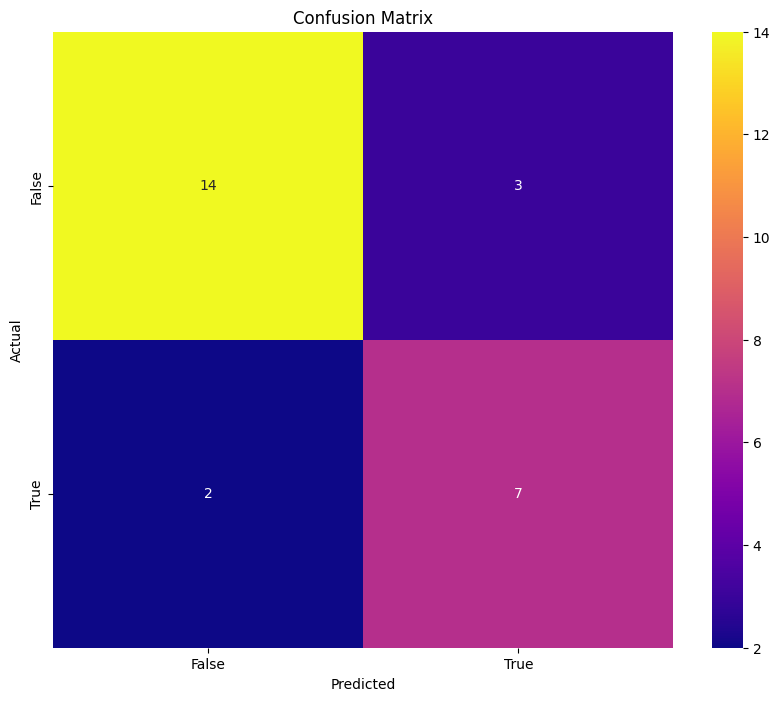

In [6]:
import os
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


desired_duration = 15

# Base directory
base_dir = 'C:/Users/shrra/Downloads/Bridge2AI_fil/bridge2ai-voice-corpus-2-including-sensitive-recordings/bids_with_sensitive_recordings'

# WAV file
target_wav_suffix = 'Rainbow-Passage_rec-Rainbow-Passage_trimmed.wav'

def load_wav_file(file_path, duration):
    try:
        y, sr = librosa.load(file_path, sr=None)
        target_samples = duration * sr

        if len(y) > target_samples:
            y = y[:int(target_samples)] 
        else:
            y = np.pad(y, (0, int(target_samples) - len(y)), 'constant') 

        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        return mel_spectrogram
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path} - {e}")
        return None

def extract_features_labels(df, base_dir, target_wav_suffix, duration):
    features = []
    labels = []
    for _, row in df.iterrows():
        subject_id = f"sub-{row['record_id']}"
        session_id = f"ses-{row['demographics_session_id']}"
        race = row['airway_stenosis']
        subject_folder = os.path.join(base_dir, subject_id, session_id, 'audio')
        
        if not os.path.exists(subject_folder):
            print(f"Subject folder does not exist: {subject_folder}")
            continue

        found_file = False
        for file_name in os.listdir(subject_folder):
            if file_name.endswith(target_wav_suffix):
                file_path = os.path.join(subject_folder, file_name)
                mel_spectrogram = load_wav_file(file_path, duration)
                if mel_spectrogram is not None:
                    features.append(mel_spectrogram.T) 
                    labels.append(race)
                found_file = True
                break
        if not found_file:
            print(f"No matching file found for subject {subject_id}")

    return np.array(features), np.array(labels)


X_train, y_train = extract_features_labels(df_train, base_dir, target_wav_suffix, desired_duration)
X_val, y_val = extract_features_labels(df_val, base_dir, target_wav_suffix, desired_duration)
X_test, y_test = extract_features_labels(df_test, base_dir, target_wav_suffix, desired_duration)


if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
    print("No features or labels were extracted. Exiting.")
    exit()


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))
X_val_reshaped = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], -1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))


model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])


learning_rate = 0.005  


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


num_epochs = 25
history = model.fit(X_train_reshaped, y_train_encoded, 
                    epochs=num_epochs, 
                    validation_data=(X_val_reshaped, y_val_encoded),
                    batch_size=32)


val_loss, val_accuracy = model.evaluate(X_val_reshaped, y_val_encoded)
print(f"\nValidation Accuracy: {val_accuracy}")

y_test_pred = model.predict(X_test_reshaped)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_accuracy = accuracy_score(y_test_encoded, y_test_pred_classes)
print(f"\nTest Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_encoded, y_test_pred_classes, target_names=label_encoder.classes_.astype(str)))


conf_mat = confusion_matrix(y_test_encoded, y_test_pred_classes)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [10]:
df_test['predictions'] = y_test_pred_classes
print("Sample of df_test:")
print(df_test.head())

print("Sample of predictions:")
print(y_test_pred_classes[:5])  

print("DataFrame index:")
print(df_test.index)


Sample of df_test:
   Unnamed: 0                             record_id  \
0          76  5da3c0da-f5d0-45cb-a352-cacf58b5d9ef   
1          54  c9b77a28-1257-451b-aed2-06b038c19d2e   
2           5  4c55b481-e8a5-41fe-94c3-61d64f7a0ae2   
3          21  119daa75-d633-4f1f-9bec-d0650715b41f   
4           5  4c55b481-e8a5-41fe-94c3-61d64f7a0ae2   

                demographics_session_id  demographics_duration  \
0  55B2B318-932A-4FF9-8CF5-9BDC2DD158B4                    171   
1  B0AE4C93-435B-4B1D-989D-4085644771A0                    406   
2  C5140641-AC9E-47B0-B415-0188D0B76077                    267   
3  2659BB64-55CC-49CD-AEA2-CEE08CEFFDC9                    229   
4  C5140641-AC9E-47B0-B415-0188D0B76077                    267   

   demographics_completed_by___1  demographics_completed_by___2  \
0                           True                          False   
1                           True                          False   
2                           True                    

Columns in df_test: Index(['Unnamed: 0', 'record_id', 'demographics_session_id',
       'demographics_duration', 'demographics_completed_by___1',
       'demographics_completed_by___2', 'demographics_completed_by___3',
       'state_province', 'country', 'gender_identity',
       ...
       'diagnosis_als_treatment_and_management_yes_medications___symptomatic_treatment',
       'diagnosis_als_treatment_and_management_yes_medications___other',
       'diagnosis_als_treatment_and_management_yes_supportive_care___physical_therapy',
       'diagnosis_als_treatment_and_management_yes_supportive_care___occupational_therapy',
       'diagnosis_als_treatment_and_management_yes_supportive_care___speech_therapy',
       'diagnosis_als_treatment_and_management_yes_supportive_care___respiratory_support',
       'diagnosis_als_treatment_and_management_yes_supportive_care___nutrition_support',
       'diagnosis_als_treatment_and_management_yes_supportive_care___psychotherapy',
       'diagnosis_als_

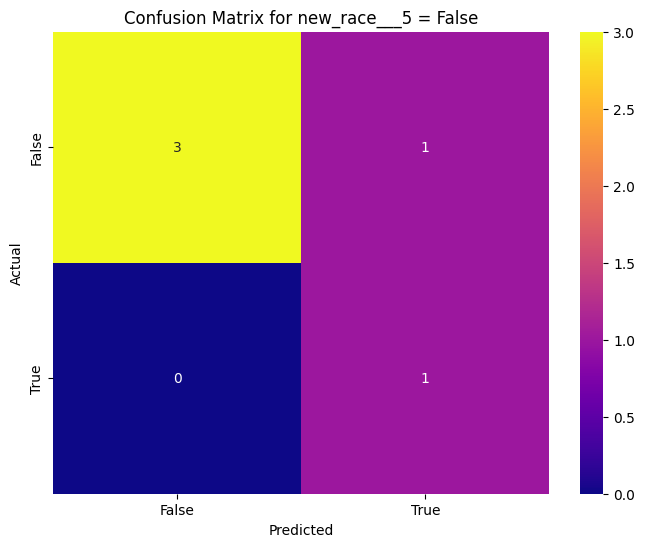

Accuracy for new_race___5 = True: 0.8095238095238095
Classification Report for new_race___5 = True:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85        13
        True       0.75      0.75      0.75         8

    accuracy                           0.81        21
   macro avg       0.80      0.80      0.80        21
weighted avg       0.81      0.81      0.81        21



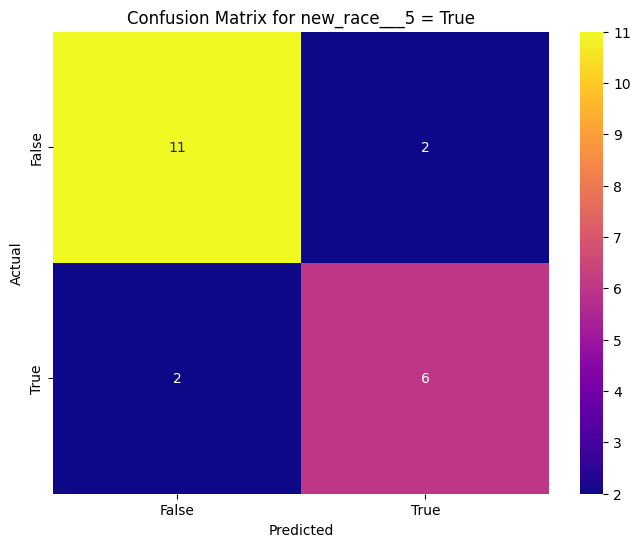

Kruskal-Wallis H-test result: H-statistic = 1.0, p-value = 0.31731050786291115


In [11]:
#  'airway_stenosis' is present
print("Columns in df_test:", df_test.columns)


if 'airway_stenosis' not in df_test.columns:
    raise KeyError("'airway_stenosis' column is missing from df_test")

df_test['predictions'] = y_test_pred_classes

for race_value in df_test['new_race___5'].unique():
    subset = df_test[df_test['new_race___5'] == race_value]

    if subset.empty:
        print(f"No data for new_race___5 = {race_value}")
        continue
    
    if 'airway_stenosis' not in subset.columns or 'predictions' not in subset.columns:
        raise KeyError("Required columns are missing in the subset")

    y_true_subset = subset['airway_stenosis']
    y_pred_subset = subset['predictions']
    
    accuracy = accuracy_score(y_true_subset, y_pred_subset)
    print(f"Accuracy for new_race___5 = {race_value}: {accuracy}")

    print(f"Classification Report for new_race___5 = {race_value}:")
    print(classification_report(y_true_subset, y_pred_subset, target_names=label_encoder.classes_.astype(str)))

    conf_mat = confusion_matrix(y_true_subset, y_pred_subset)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma', xticklabels=label_encoder.classes_.astype(str), yticklabels=label_encoder.classes_.astype(str))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for new_race___5 = {race_value}')
    plt.show()

# Perform a statistical test to check for bias
# Accuracy scores for each subset
accuracy_scores = []
for race_value in df_test['new_race___5'].unique():
    subset = df_test[df_test['new_race___5'] == race_value]
    
    if subset.empty:
        print(f"No data for new_race___5 = {race_value}")
        continue
    
    y_true_subset = subset['airway_stenosis']
    y_pred_subset = subset['predictions']
    accuracy = accuracy_score(y_true_subset, y_pred_subset)
    accuracy_scores.append(accuracy)

# Check if we have at least two groups to perform the Kruskal-Wallis test
if len(accuracy_scores) < 2:
    raise ValueError("Not enough groups for statistical testing")

# Kruskal-Wallis H-test
kruskal_test_result = stats.kruskal(*accuracy_scores)
print(f"Kruskal-Wallis H-test result: H-statistic = {kruskal_test_result.statistic}, p-value = {kruskal_test_result.pvalue}")



In [12]:
from scipy import stats

# Prepare contingency table for Chi-Square test
contingency_tables = {}

for race_value in df_test['new_race___5'].unique():
    subset = df_test[df_test['new_race___5'] == race_value]

    if subset.empty:
        print(f"No data for new_race___5 = {race_value}")
        continue

    observed = pd.crosstab(subset['airway_stenosis'], subset['predictions'])
    contingency_tables[race_value] = observed

    # Print the contingency table
    print(f"Contingency Table for new_race___5 = {race_value}:")
    print(observed)

# Perform Chi-Square test
for race_value, observed in contingency_tables.items():
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)
    
    print(f"Chi-Square Test for new_race___5 = {race_value}:")
    print(f"Chi-Square Statistic = {chi2_stat}")
    print(f"p-value = {p_value}")
    print(f"Degrees of Freedom = {dof}")
    print(f"Expected Frequencies:")
    print(expected)


Contingency Table for new_race___5 = False:
predictions      0  1
airway_stenosis      
False            3  1
True             0  1
Contingency Table for new_race___5 = True:
predictions       0  1
airway_stenosis       
False            11  2
True              2  6
Chi-Square Test for new_race___5 = False:
Chi-Square Statistic = 0.05208333333333333
p-value = 0.8194769767775212
Degrees of Freedom = 1
Expected Frequencies:
[[2.4 1.6]
 [0.6 0.4]]
Chi-Square Test for new_race___5 = True:
Chi-Square Statistic = 5.149523853550297
p-value = 0.02325274838070309
Degrees of Freedom = 1
Expected Frequencies:
[[8.04761905 4.95238095]
 [4.95238095 3.04761905]]


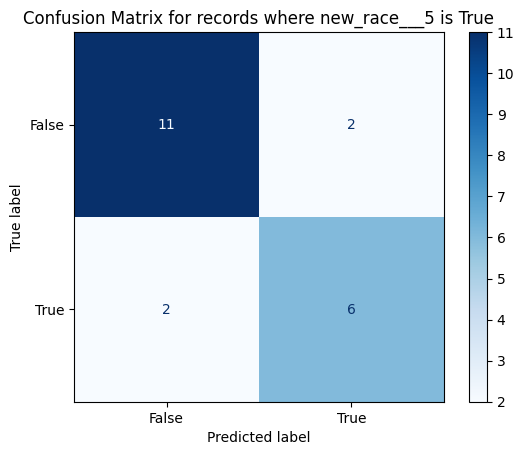

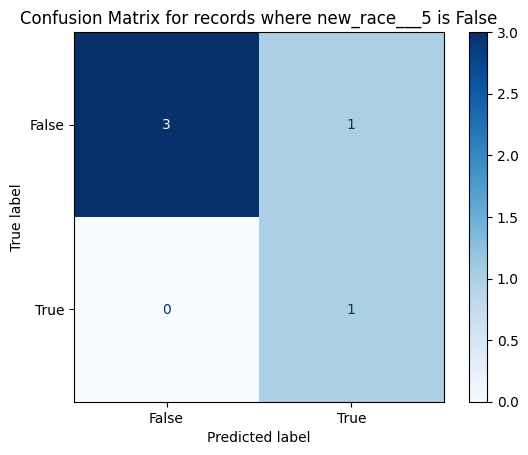

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


df_test = df_test.reset_index(drop=True)


new_race_true_indices = df_test.index[df_test['new_race___5'] == True].tolist()
new_race_false_indices = df_test.index[df_test['new_race___5'] == False].tolist()


true_labels_true_race = y_test_encoded[new_race_true_indices]
pred_labels_true_race = y_test_pred_classes[new_race_true_indices]

true_labels_false_race = y_test_encoded[new_race_false_indices]
pred_labels_false_race = y_test_pred_classes[new_race_false_indices]


cm_true_race = confusion_matrix(true_labels_true_race, pred_labels_true_race)
cm_false_race = confusion_matrix(true_labels_false_race, pred_labels_false_race)


def plot_confusion_matrix(cm, classes, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()


class_labels = label_encoder.classes_.astype(str)


plot_confusion_matrix(cm_true_race, class_labels, 'Confusion Matrix for records where new_race___5 is True')


plot_confusion_matrix(cm_false_race, class_labels, 'Confusion Matrix for records where new_race___5 is False')
